#Overview
This recipe shows the basic concepts behind the **ete-build** tool, and how to build a phylogetic tree from scratch using predefined workflows. 

## Requirements

Install ete3 and all the external software used to compute trees, sequence alignments, etc. 
 - The recommended way to install those tools is using the Anaconda environment, as all tools are distributed as precompiled binary. It is plug&play solution requiring nos admin permisions and installing a full computing environment in a few minutres, either Linux or Max OS X. 
 - you can also use the manual instalation process by running `ete3 upgrade-external-tools`, which will try to compile all tools from scratch. 

Either way, check installation instructions at http://etetoolkit.org/download/




### 1. Check that all applications are available 

In [5]:
! ete3 build check

Current Toolchain path: /Users/jhc/anaconda3/bin/ete3_apps 
Current Toolchain version: 2.0.4

Checking             clustalo... OK.	1.2.1
Dialign-tx not supported in OS X
Checking             fasttree... OK.	Usage for FastTree version 2.1.8 Double precision (No SSE3), OpenMP (1 threads):
Checking               kalign... OK.	Kalign version 2.04, Copyright (C) 2004, 2005, 2006 Timo Lassmann
Checking                mafft... OK.	MAFFT v6.861b (2011/09/24)
Checking               muscle... OK.	MUSCLE v3.8.31 by Robert C. Edgar
Checking                phyml... OK.	. This is PhyML version 20160115.
Checking           pmodeltest... OK.	pmodeltest.py v1.4
Checking                prank... OK.	prank v.100802. Minimal usage: 'prank sequence_file'
Checking             probcons... OK.	PROBCONS version 1.12 - align multiple protein sequences and print to standard output
Checking                raxml... OK.	This is RAxML version 8.1.20 released by Alexandros Stamatakis on April 18 2015.
Checking       r

### 2. Have a look at the available workflows

In [4]:
! ete3 build workflows

                     Available supermatrix (meta)-workflows                     
  sptree_fasttree_100                      (  1 threads)
  sptree_fasttree_85                       (  1 threads)
  sptree_fasttree_90                       (  1 threads)
  sptree_fasttree_95                       (  1 threads)
  sptree_fasttree_all                      (  1 threads)
  sptree_raxml_100                         (  1 threads)
  sptree_raxml_85                          (  1 threads)
  sptree_raxml_90                          (  1 threads)
  sptree_raxml_95                          (  1 threads)
  sptree_raxml_all                         (  1 threads)
                      Available genetree (meta)-workflows                       
  eggnog41                                 (  1 threads)
  ensembl_large                            (  1 threads)
  ensembl_small                            (  1 threads)
  full_fast_modeltest                      (  1 threads)
  full_fast_modeltest_bootstrap         

### 3. Prepare your sequences as a FASTA file

- Although `ete-build` perform some basic checks on the input file, make sure that your data is correctly encoded as FASTA format.

- It is recommended that the header of the FASTA file does not contain weird symbols and that sequene names are not duplicated (ete will raise an error otherwise). 

- You can use amino acids or nucleotide sequences. 

For this example, we will use the following amino-acid FASTA file: 


In [10]:
! wget http://etetoolkit.org/static/data/NUP62.aa.fa 2>/dev/null
! head NUP62.aa.fa -n20


>Phy003I7ZJ_CHICK
TMSQFNFSSAPAGGGFSFSTPKTAASTTAATGFSFTPAPSSGFTFGGAAPTPASSQPVTP
FSFSTPASSALPTAFSFGTPATATTAAPAASVFPLGGNAPKLNFGGTSTTQATGITGGFG
FGTSAPTSVPSSQAAAPSGFMFGTAATTTTTTTAAQPGTTGGFTFSSGTTTQAGTTGFNI
GATSTAAPQAVPTGLTFGAAPAAAATTTASLGSTTQPAATPFSLGGQSSATLTASTSQGP
TLSFGSKLGVTTTASTTTAASTAPLLGSTGPVLFASIASSSAPASSTSTGLSLGAPSTGT
TGLGTSGFGLKPPGTTAAATSTATSTSASSFALNLKPLTTTGTIGAVTSTAAITTTTPSA
PPVMTYAQLESLINKWSLELEDQEKHFLHQATQVNAWDRTLIENGEKITSLHREVEKVKL
DQKRLDQELDFILSQQKELEDLLTPLEESVKEQSGTIYLQHADEERERTYKLAENIDAQL
KRMAQDLKDIIEHLNTSGRPADTSDPLQQICKILNAHMDSLQWIDQNSALLQRKVEEVTK
VCESRRKEQERSFRITFD
>Phy0054BO3_MELGA
GNAPKLNFGGTSTTQATGITGGFGFGTSAPTSVPSSQAAAPSGFMFGSATATTTTTTAAQ
PGTTGGFTFSSGTTTQAGTTGFNIGTTSTAAPQAAPTGLTFGAAPAAAAATTTASLGSTA
QPAAAPFSLGGQPSATLTASTSQGPTLSFGSKLGVTTTASTTTAASTAPLLGTTGPVLFA
SIASSSAPASSSSTGLSLGAPSTGTTGLGTSGFGLKPPGTTAATTSTATSTSASSFALNL
KPLTTTGTIGAVTSTAAVTTTTTTSAPPVMTYAQLESLINKWSLELEDQEKHFLHQATQV
NAWDRTLIENGEKITSLHREVEKVKLDQKRLDQELDFILSQQKELEDLLTPLEESVKEQS
GTIYLQHADEERERTYKLAENIDAQLKRMA

### 4. Pick a workflow name from the list in step 2 and run the workflow

Three parameters are required: 

- Use `-a` to provide an amino acid sequence file and `-n` for nucleotides
- `-o` defines the output directory (should not exist, otherwise `--resume` or `--clearall` will be also required)
- `-w` defines the name of the workflow to run. For this example we will use `standard_fasttree`

In [12]:
! ete3 build -w standard_fasttree -a NUP62.aa.fa -o NUP62_tree/ --clearall

Toolchain path: /Users/jhc/anaconda3/bin/ete3_apps 
Toolchain version: 2.0.4


      --------------------------------------------------------------------------------
                  ETE build - reproducible phylogenetic workflows 
                                    unknown, unknown.

      If you use ETE in a published work, please cite:

        Jaime Huerta-Cepas, Joaquín Dopazo and Toni Gabaldón. ETE: a python
        Environment for Tree Exploration. BMC Bioinformatics 2010,
        11:24. doi:10.1186/1471-2105-11-24

      (Note that a list of the external programs used to complete all necessary
      computations will be also shown after execution. Those programs should
      also be cited.)
      --------------------------------------------------------------------------------

    
INFO -  Testing x86-64  portable applications...
Checking             clustalo... OK.	1.2.1
Dialign-tx not supported in OS X
Checking             fasttree... OK.	Usage for FastTree version 2.1.8 Do

After a few minutes you should get the process done and get a list of generated files and references to the software used. All results will be stored in the provided output dir, whose structure is the following: 

In [16]:
!ls NUP62_tree/ -ltr

total 48
drwxr-xr-x 12 jhc staff   408 Jan 20 13:16 clustalo_default-none-none-fasttree_full
-rw-r--r--  1 jhc staff 45621 Jan 20 13:18 ete_build.cfg
drwxr-xr-x  4 jhc staff   136 Jan 20 13:18 tasks
drwxr-xr-x 18 jhc staff   612 Jan 20 13:19 db


- the `ete_build.cfg` is a copy of the configuration file used (including all workflow options, etc.)
- `db/` and `tasks/` are temporary directories used to run different processes. They are used in case you want to resume an analysis or if you need to debug any issue. Every job (i.e. FastTree, ClustalO, etc. will generate one or more directories in `tasks`) 
- **your results** are stored in the folder matching the raw name of the workflow chosen. `standard_fastree` translates into a workflow using clustal Omega and Fasttree, and skipping model testing and alignment trimming, so the result dir is `clustalo_default-none-none-fasttree_full`

Note that a full path pointer to the final tree and alignment is also printed when ete3 finishes. 

### 5. Explore your tree

- As we did not use the `--noimg` flag in ete-build, an automatic image of results was generated. 

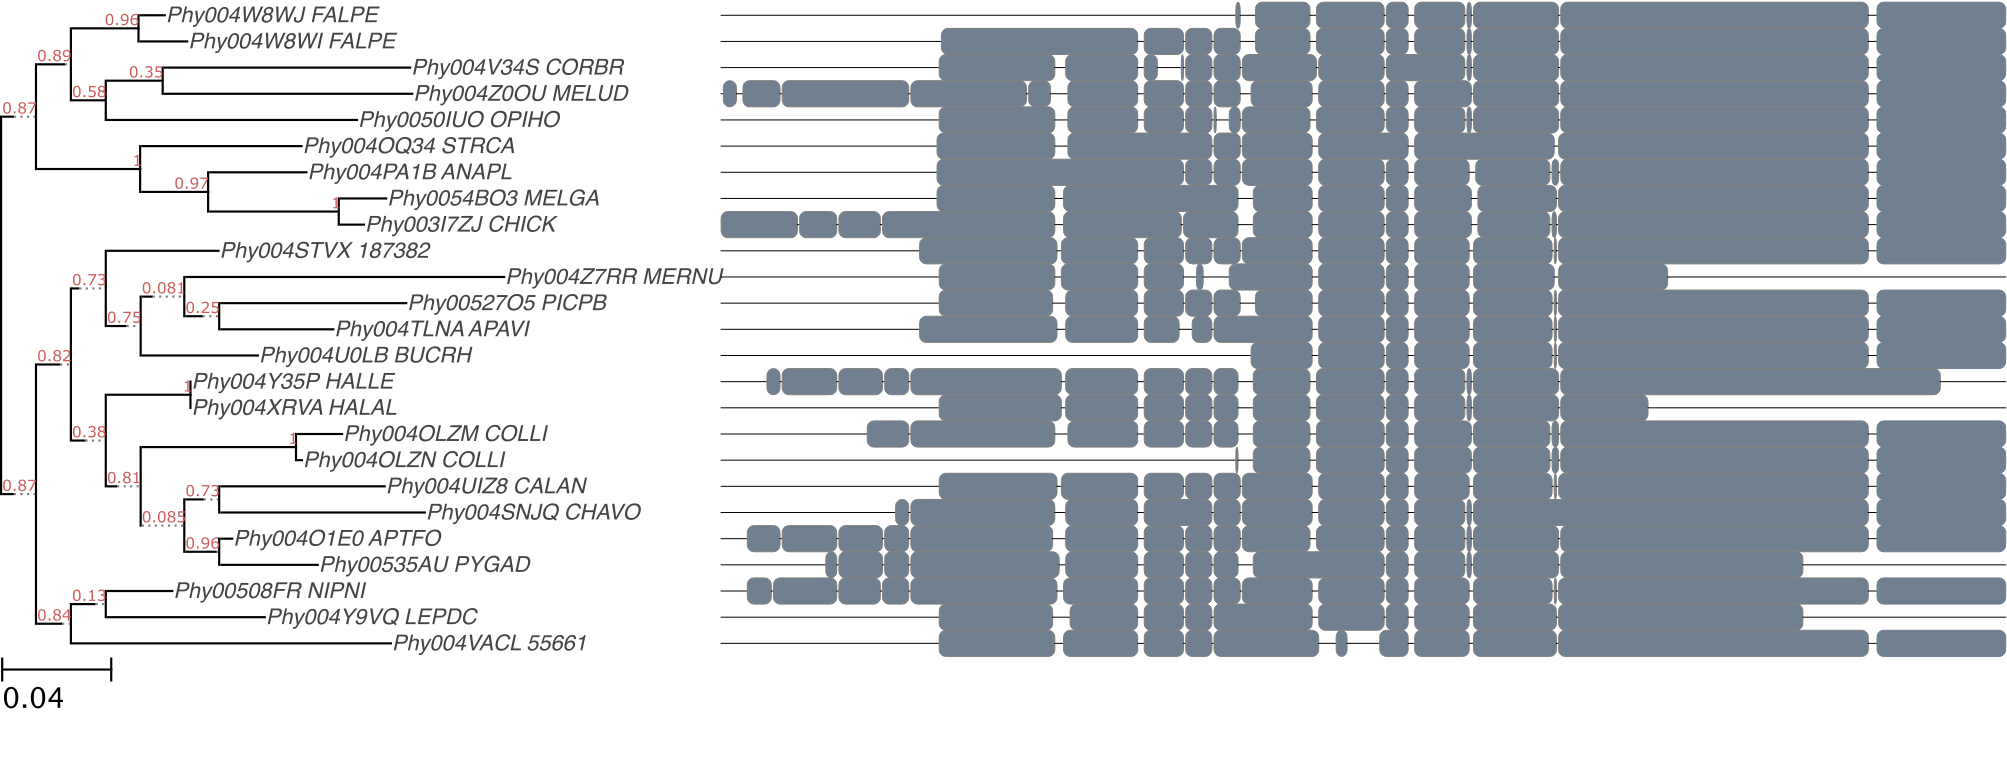

In [66]:
from IPython.display import Image
Image(filename='NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.png')

- However, you can also have a quick look at the resulting tree from your terminal using `ete3 view --text` 

In [19]:
! ete3 view --text -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw


            /-Phy004W8WJ_FALPE
         /-|
        |   \-Phy004W8WI_FALPE
      /-|
     |  |      /-Phy004V34S_CORBR
     |  |   /-|
     |   \-|   \-Phy004Z0OU_MELUD
   /-|     |
  |  |      \-Phy0050IUO_OPIHO
  |  |
  |  |   /-Phy004OQ34_STRCA
  |   \-|
  |     |   /-Phy004PA1B_ANAPL
  |      \-|
  |        |   /-Phy0054BO3_MELGA
  |         \-|
  |            \-Phy003I7ZJ_CHICK
  |
  |         /-Phy004STVX_187382
  |        |
  |      /-|      /-Phy004Z7RR_MERNU
--|     |  |   /-|
  |     |  |  |  |   /-Phy00527O5_PICPB
  |     |   \-|   \-|
  |     |     |      \-Phy004TLNA_APAVI
  |     |     |
  |   /-|      \-Phy004U0LB_BUCRH
  |  |  |
  |  |  |      /-Phy004Y35P_HALLE
  |  |  |   /-|
  |  |  |  |   \-Phy004XRVA_HALAL
  |  |  |  |
  |  |   \-|      /-Phy004OLZM_COLLI
  |  |     |   /-|
  |  |     |  |   \-Phy004OLZN_COLLI
  |  |     |  |
   \-|      \-|      /-Phy004UIZ8_CALAN
     |        |   /-|
     |        |  |   \-Phy004SNJQ_CHAVO
     |         \-|
     |           | 

- open an interative interface to browse it: 

     `ete3 view -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw`

- Or even generate an SVG figure of the tree and alignment

In [65]:
! ete3 view --image tree.svg -t NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw 

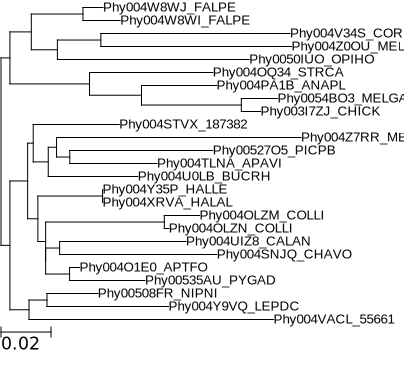

In [71]:
from IPython.display import SVG
SVG(filename='t0.tree.svg')

### 6. Load tree and alignment using the ETE3 API for further analysis 

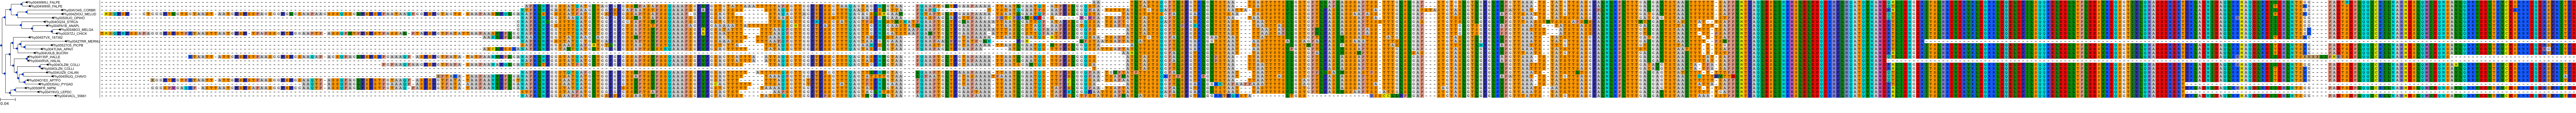

In [46]:
from ete3 import PhyloTree
t = PhyloTree("NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.nw")
t.link_to_alignment("NUP62_tree/clustalo_default-none-none-fasttree_full/NUP62.aa.fa.final_tree.used_alg.fa")
t.render("%%inline")

### 7. Build your tree using a different workflow and compare results

- Return to step 2 and pick a different workflow name (think that same may take longer to compute than other)
- Run a new analysis using another workflow. 
- If you use the same output dir for your results and the `--resume` flag, shared tasks between workflows will be reused saving computation time. Results will be stored under different subdirectories matching workflow names. 

If you are interested in running multiple workflows, take a look the recipe for [meta-workflow approach](ete_build_metaworkflow.ipynb)